In [4]:
## Loading the data ##

import numpy as np
import pandas as pd

#Reading the csv file into the dandas Dataframe
data = pd.read_csv('student_data.csv')

#Printing out the first 10 rows of our data
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


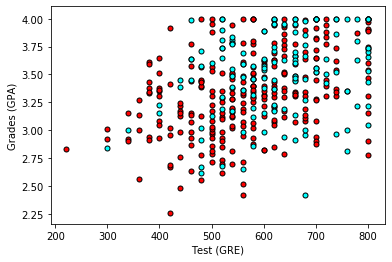

In [7]:
## Ploting the data ##

import matplotlib.pyplot as plt
%matplotlib inline

#Function to help use plot
def plot_points(data):
    x = np.array(data[['gre', 'gpa']])
    y = np.array(data['admit'])
    
    admitted = x[np.argwhere(y==1)]
    rejected = x[np.argwhere(y==0)]
    #! numpy.argwhere(a) : find the indices of array elements that are,non-zero, rfouped by element
    #Similar as np.transpose(np.nonzero(a))
    # Output of argwhere is not suitable for idexing arrays. For that purpose,it is better to use np.transpose(np.nonzero(a))

    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
#Ploting the points
plot_points(data)
plt.show()

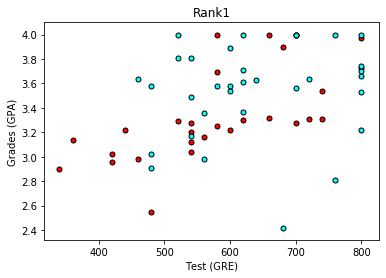

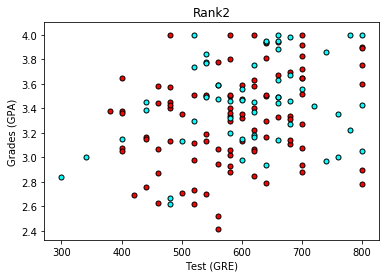

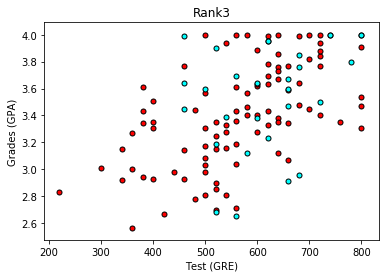

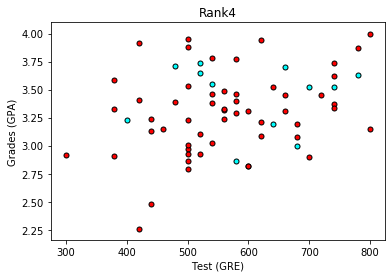

In [9]:
#separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]


#ploting the graphs
plot_points(data_rank1)
plt.title("Rank1")
plt.show()
plot_points(data_rank2)
plt.title("Rank2")
plt.show()
plot_points(data_rank3)
plt.title("Rank3")
plt.show()
plot_points(data_rank4)
plt.title("Rank4")
plt.show()


In [10]:
## One-hot encoding the rank ##
#Use get_dummies function in pandas in order to one-hot encode the data
#To drop a column : one_hot_data.drop()
#! one-hot-endoder is for categorical data, that are variables that contain label values rather than numeric values.


#Male dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix = 'rank')], axis = 1)

#drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis = 1)

#Print the first 10 rows of column
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [11]:
## Scaling the data ##

processed_data = one_hot_data[:]

#scailing the columns
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]


,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


In [13]:
## Spliting the data into training and testing

sample = np.random.choice(processed_data.index, size = int(len(processed_data)*0.9), replace = False)
#! np.random.choice : generate a random sample from a given 1D array
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)
                        #(train_data)               (1 - train_data = test_data)
#! <.iloc> is used to select rows and columns by number,

print("Number of training sample is ", len(train_data))
print("Number of testing sample is ", len(test_data))
print(train_data[:10])
print(test_data[:10])


Number of training sample is  360
Number of testing sample is  40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
12       1  0.950  1.0000       1       0       0       0
91       1  0.900  0.9100       1       0       0       0
255      0  0.800  0.8375       0       0       1       0
294      0  0.600  0.6375       1       0       0       0
77       1  1.000  1.0000       0       0       1       0
219      1  0.700  0.8975       0       1       0       0
50       0  0.800  0.9650       0       0       1       0
214      1  0.750  0.8900       0       1       0       0
308      0  0.675  0.7825       0       1       0       0
212      0  0.575  0.7175       0       1       0       0
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
32       0  0.750  0.8500       0       0       1       0
36       0  0.725  0.8125       1       0       0       0
47       0  0.625  0.7425       0       0       0       1
49       0  0.500  0.8375       0       0       1       0
80    

In [14]:
## Spliting the data into features and targets(label)

features = train_data.drop('admit', axis = 1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis = 1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

       gre     gpa  rank_1  rank_2  rank_3  rank_4
12   0.950  1.0000       1       0       0       0
91   0.900  0.9100       1       0       0       0
255  0.800  0.8375       0       0       1       0
294  0.600  0.6375       1       0       0       0
77   1.000  1.0000       0       0       1       0
219  0.700  0.8975       0       1       0       0
50   0.800  0.9650       0       0       1       0
214  0.750  0.8900       0       1       0       0
308  0.675  0.7825       0       1       0       0
212  0.575  0.7175       0       1       0       0
12     1
91     1
255    0
294    0
77     1
219    1
50     0
214    1
308    0
212    0
Name: admit, dtype: int64


In [28]:
## Training the 2-layers Neural Network

# Activation(sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))
def error_formula(y, output):
    return -y*np.log(output) - (1 - y) * np.log(1 - output)

In [29]:
## Backpropogate the error
def error_term_formula(x, y, output):
    return (y - output)*sigmoid_prime(x)
    # alternative way below:
    #return (y - output) * output * (1 - output)

In [31]:
## Neural Network hyperparameters
epochs = 1000
lr = 0.5

#Training function
def train_nn(features, targets, epochs, lr):
    
    # Use to same seed to make debugging easier
    #! np.random.seed() makes the random number predictable, with the seed , when you reset, everytime the same set of number will apear
    np.random.seed(42)
    
    n_records, n_features = features.shape
    last_loss = None
    
    #Initialize weights
    weights = np.random.normal(scale = 1 / n_features**.5, size = n_features)
    
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        #Loop through all records, x : input, y : target
        for x, y in zip(features.values, targets):
            
            # activation of output unit
            #We multiply the inputs and weights here
            #! np.dot : Dot product of two arrays specifically
            output = sigmoid(np.dot(x, weights))
            
            #The error : target - network output
            error = error_formula(y, output)
            
            #The error term( for backpropogate)
            error_term = error_term_formula(x, y, output)
            
            #The gradient descent step, the error * gradient * input
            del_w += error_term * x
            
        #Update the weight
        weights += lr * del_w / n_records
        
        #Printing out the mean squared error on the trainng set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch : ", e)
            if last_loss and last_loss < loss:
                print("Train loss : ", loss, " WARNING - Loss Increasing ")
            else:
                print("Train loss : ", loss)
            last_loss = loss
            print("==============")
    print("Fininshing traning++")
    return weights

weights = train_nn(features, targets, epochs, lr)

Epoch :  0
Train loss :  0.27662228847596027
Epoch :  100
Train loss :  0.21326761823739895
Epoch :  200
Train loss :  0.21059607894618315
Epoch :  300
Train loss :  0.20931962106503058
Epoch :  400
Train loss :  0.20866762107027165
Epoch :  500
Train loss :  0.208299631873945
Epoch :  600
Train loss :  0.20806493224136807
Epoch :  700
Train loss :  0.2078951267926814
Epoch :  800
Train loss :  0.20775826075475
Epoch :  900
Train loss :  0.20763899434407793
Fininshing traning++


In [32]:
## Calculating the accuracy on the test data ##

test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Predictions accuracy: {:.3f}".format(accuracy))

Predictions accuracy: 0.675
